In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d andrewmvd/face-mask-detection

 97% 384M/398M [00:01<00:00, 266MB/s]
100% 398M/398M [00:01<00:00, 234MB/s]


In [ ]:
import zipfile
zip_ref=zipfile.ZipFile('/content/face-mask-detection.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
!kaggle datasets download -d ashishjangra27/face-mask-12k-images-dataset

 95% 315M/330M [00:05<00:00, 53.0MB/s]
100% 330M/330M [00:05<00:00, 61.5MB/s]


In [ ]:
import zipfile
zip_ref=zipfile.ZipFile('/content/face-mask-12k-images-dataset.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
!kaggle datasets download -d lalitharajesh/haarcascades

  0% 0.00/1.45M [00:00<?, ?B/s]
100% 1.45M/1.45M [00:00<00:00, 181MB/s]


In [ ]:
zip_ref=zipfile.ZipFile('/content/haarcascades.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import cv2
face_model=cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')

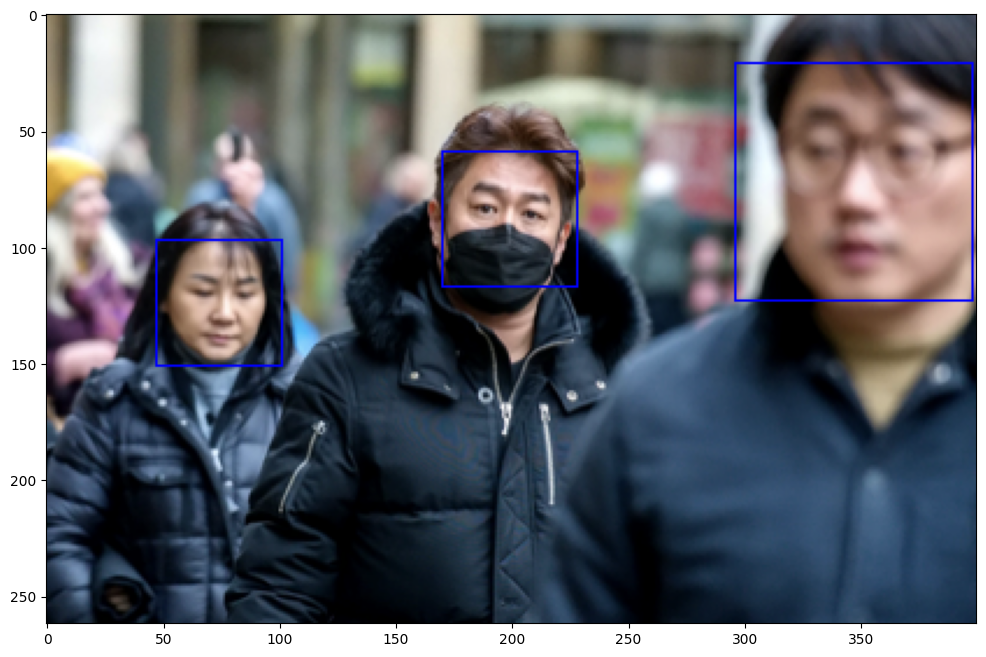

In [ ]:
import matplotlib.pyplot as plt
img=cv2.imread('images/maksssksksss244.png')

img=cv2.cvtColor(img,cv2.IMREAD_GRAYSCALE)

faces=face_model.detectMultiScale(img, scaleFactor=1.1, minNeighbors=4)

out_img=cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

for (x,y,w,h) in faces:
  cv2.rectangle(out_img, (x,y),(x+w,y+h),(0,0,255),1)
plt.figure(figsize=(12,12))
plt.imshow(out_img)

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Flatten

In [ ]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


for layer in base_model.layers:
    layer.trainable = False

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[

In [ ]:
train_dir='/content/Face Mask Dataset/Train'
test_dir='/content/Face Mask Dataset/Test'
vaildation_dir='/content/Face Mask Dataset/Validation'

In [ ]:
train_datagen=ImageDataGenerator(rescale=1.0/255, horizontal_flip=True, zoom_range=0.2, shear_range=0.2)
train_generator=train_datagen.flow_from_directory(directory=train_dir,target_size=(128,128), class_mode='categorical',batch_size=32)

val_datagen=ImageDataGenerator(rescale=1.0/255)
val_generator=val_datagen.flow_from_directory(directory=vaildation_dir,target_size=(128,128), class_mode='categorical',batch_size=32)

test_datagen=ImageDataGenerator(rescale=1.0/255)
test_generator=test_datagen.flow_from_directory(directory=test_dir,target_size=(128,128), class_mode='categorical',batch_size=32)


Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 992 images belonging to 2 classes.


In [ ]:
model1 = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dense(2, activation='softmax')
])


In [ ]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense_3 (Dense)             (None, 128)               163968    
                                                                 
 dense_4 (Dense)             (None, 2)                 258       
                                                                 
Total params: 2422210 (9.24 MB)
Trainable params: 164226 (641.51 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [ ]:
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model1.fit_generator(generator=train_generator,
                              steps_per_epoch=len(train_generator),
                              epochs=20,
                              validation_data=val_generator,
                              validation_steps=len(val_generator))

<ipython-input-52-788cb1d16799>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model1.fit_generator(generator=train_generator,


Epoch 1/20
313/313 [==============================] - 59s 175ms/step - loss: 0.0434 - accuracy: 0.9834 - val_loss: 0.0209 - val_accuracy: 0.9912
Epoch 2/20
313/313 [==============================] - 54s 173ms/step - loss: 0.0197 - accuracy: 0.9931 - val_loss: 0.0131 - val_accuracy: 0.9950
Epoch 3/20
313/313 [==============================] - 54s 173ms/step - loss: 0.0141 - accuracy: 0.9948 - val_loss: 0.0202 - val_accuracy: 0.9925
Epoch 4/20
313/313 [==============================] - 54s 171ms/step - loss: 0.0134 - accuracy: 0.9957 - val_loss: 0.0090 - val_accuracy: 0.9962
Epoch 5/20
313/313 [==============================] - 54s 171ms/step - loss: 0.0081 - accuracy: 0.9972 - val_loss: 0.0133 - val_accuracy: 0.9950
Epoch 6/20
313/313 [==============================] - 55s 175ms/step - loss: 0.0116 - accuracy: 0.9960 - val_loss: 0.0065 - val_accuracy: 0.9975
Epoch 7/20
313/313 [==============================] - 54s 174ms/step - loss: 0.0095 - accuracy: 0.9974 - val_loss: 0.0326 - val_ac

In [ ]:
model1.evaluate_generator(test_generator)

<ipython-input-54-8f4dea1d8744>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model1.evaluate_generator(test_generator)


[0.016666773706674576, 0.9909273982048035]

1/1 [==============================] - 1s 781ms/step


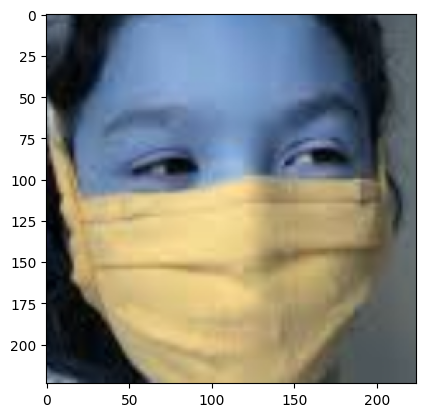

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

sample_mask_img = cv2.imread('Face Mask Dataset/Test/WithMask/1565.png')
sample_mask_img = cv2.resize(sample_mask_img, (224, 224))  # Resize to match the model's input shape
plt.imshow(sample_mask_img)
sample_mask_img = np.reshape(sample_mask_img, [1, 224, 224, 3])
sample_mask_img = sample_mask_img / 255.0

predictions = model1.predict(sample_mask_img)

In [ ]:
predictions

array([[0.93456316, 0.06543685]], dtype=float32)

In [ ]:
model1.save('masknet.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
mask_label = {0:'MASK',1:'NO MASK'}
dist_label = {0:(0,255,0),1:(255,0,0)}

1/1 [==============================] - 0s 22ms/step


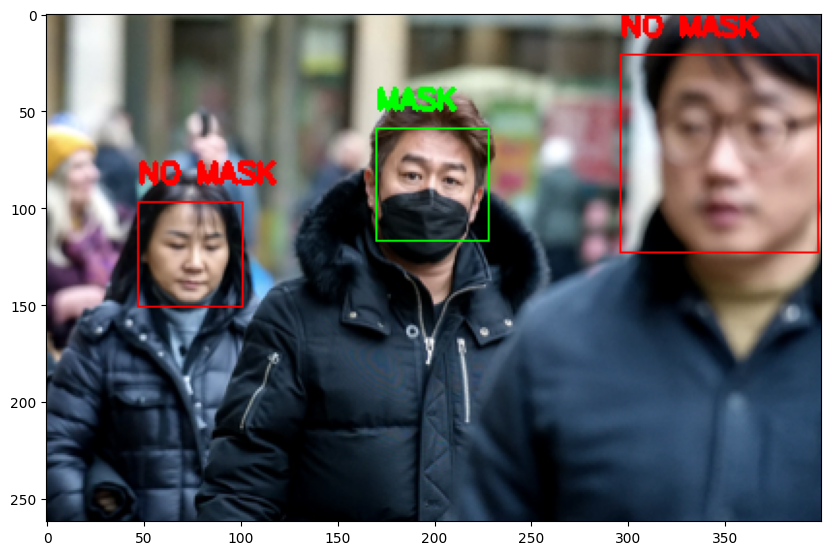

In [ ]:
mask_label = {0: 'MASK', 1: 'NO MASK'}
dist_label = {0: (0, 255, 0), 1: (255, 0, 0)}

if len(faces) >= 2:
    new_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)  # colored output image
    for i in range(len(faces)):
        (x, y, w, h) = faces[i]
        crop = new_img[y:y + h, x:x + w]
        crop = cv2.resize(crop, (128, 128))
        crop = np.reshape(crop, [1, 128, 128, 3]) / 255.0
        mask_result = model1.predict(crop)
        label = mask_result.argmax()  # Get the predicted label
        cv2.putText(new_img, mask_label[label], (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, dist_label[label], 2)
        cv2.rectangle(new_img, (x, y), (x + w, y + h), dist_label[label], 1)  # Fix color parameter
    plt.figure(figsize=(10, 10))
    plt.imshow(new_img)
else:
    print("No. of faces detected is less than 2")
